Import Data

In [44]:
import numpy as np
import pandas as pd

# Mount google drive
from google.colab import drive 
drive.mount('/content/drive')

df_test = pd.read_csv('/content/drive/MyDrive/Python/test_data.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Python/train_data.csv')

display(df_train)
display(df_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,B2,B3,B4,B8,class_3,class_2,.geo,Contributor,coordinates
0,1122.0,1440.0,1754.0,1960.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",NK,"[146.5644056016995, -38.182756404207645]"
1,450.0,766.0,1002.0,2248.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",EG,"[144.29930361279213, -36.75695038525314]"
2,1323.0,1322.0,1153.0,1464.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[152.34102203623007, -27.554339120147525]"
3,991.0,1278.0,1672.0,2608.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.7278852605637, -37.910746536176255]"
4,1182.0,1596.0,2192.0,3113.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.8925464521428, -37.95476398509811]"
...,...,...,...,...,...,...,...,...,...
4363,748.0,989.0,1370.0,2237.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.55909181867764, -37.94066043513743]"
4364,844.5,1261.0,1740.0,2711.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.97330499618516, -37.73862932773895]"
4365,835.0,1166.0,1390.0,2324.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",EG,"[144.3028070424002, -36.765394548923865]"
4366,699.0,1068.0,1325.0,1774.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.94914031504234, -37.75012776337568]"


,B2,B3,B4,B8,class_3,class_2,.geo,Contributor,coordinates
0,283.0,780.0,727.0,3580.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",MB,"[144.25887942500674, -36.7634182552988]"
1,1180.0,1474.0,1838.0,2488.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.59385662017306, -37.98755249296847]"
2,1014.5,1283.0,1621.0,2593.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.85553586243708, -37.94164858194996]"
3,504.5,782.5,1049.0,2591.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",RJ,"[141.59806955344473, -38.130294791615064]"
4,475.0,739.0,771.5,2585.5,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[148.49533430491442, -37.748600627392676]"
...,...,...,...,...,...,...,...,...,...
1087,880.0,1208.0,1772.0,2703.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.9487809889287, -37.75003793184727]"
1088,1251.0,1537.0,1450.5,1860.5,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[152.9138776929131, -27.53718129822084]"
1089,563.5,849.5,991.5,2238.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.95758447871304, -37.75192439394392]"
1090,240.0,418.0,448.0,469.5,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.8894023486484, -37.79980459858749]"


Assign train and test data to objects

In [45]:
train_y = df_train["class_3"].to_numpy()
test_y = df_test["class_3"].to_numpy()
train_x = df_train.iloc[:,0:4].to_numpy()
test_x = df_test.iloc[:,0:4].to_numpy()

Import relevant packages and metrics

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from pprint import pprint
import matplotlib.pyplot as plt

Grid Search

In [47]:
from sklearn.naive_bayes import GaussianNB
# Grid searching key hyperparameters for GaussianNB Classifier
model = GaussianNB()
var_smoothing = 1e-09, 1e-08, 1e-07
# define grid search
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.473594 using {'var_smoothing': 1e-09}
0.473594 (0.020706) with: {'var_smoothing': 1e-09}
0.473594 (0.020706) with: {'var_smoothing': 1e-08}
0.473594 (0.020706) with: {'var_smoothing': 1e-07}


Algorithm Testing (with confusion matrix output)

Accuracy: 0.4633699633699634
Precision, Recall, Fscore: (0.4741169305599695, 0.4633699633699634, 0.43788387253637384, None)
[[146 173  45]
 [ 62 277  25]
 [171 110  83]]
              precision    recall  f1-score   support

           0       0.39      0.40      0.39       364
           1       0.49      0.76      0.60       364
           2       0.54      0.23      0.32       364

    accuracy                           0.46      1092
   macro avg       0.47      0.46      0.44      1092
weighted avg       0.47      0.46      0.44      1092

train time: 0.008932113647460938
test time: 0.0008809566497802734
Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


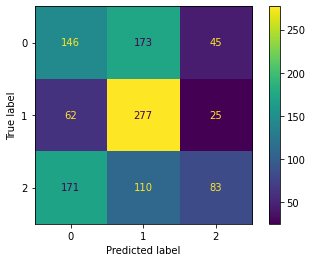

In [48]:
clf = GaussianNB(var_smoothing = 1e-09)

start_train=time.time()
clf.fit(train_x, train_y)
stop_train=time.time()

start_test=time.time()
pred_y = clf.predict(test_x)
stop_test=time.time()

print("Accuracy:",accuracy_score(test_y, pred_y))
print("Precision, Recall, Fscore:",precision_recall_fscore_support(test_y, pred_y, average='weighted'))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y,pred_y))
print("train time:", stop_train-start_train)
print("test time:", stop_test-start_test)

print('Parameters currently in use:\n')
pprint(clf.get_params())

plot_confusion_matrix(clf, test_x,test_y, values_format='d')
plt.show()

Algorithm testing (without confusion matrix, with loop)

In [49]:
gnb = GaussianNB()
#Starting scores at 0 to begin summation of scores over 100 iterations 
count = 0
accuracy = 0
precision = 0
tp_rate = 0
f_score = 0
#Loop of 100 iterations summing metrics to then be later averaged
while count <100:
    gnb.fit(train_x, train_y)
    pred_y = gnb.predict(test_x)
    score_y = gnb.predict_proba(test_x)[:,1]
    # --METRICS--
    # accuracy
    acc = accuracy_score(test_y, pred_y)
    accuracy = acc + accuracy
    # precision
    pre = precision_score(test_y, pred_y, average = 'weighted')
    precision = pre + precision
    # TPR
    tpr = recall_score(test_y, pred_y, average = 'weighted')
    tp_rate = tpr + tp_rate
    # Fscore
    f1 = f1_score(test_y, pred_y, average = 'weighted')
    f_score = f1 + f_score
    count = count + 1

#Average metrics over 100 iterations
print('accuracy:',accuracy/100)
print('precision',precision/100)
print('TP rate:',tp_rate/100)
print('F score:',f_score/100)

#Parameters used
print('Parameters currently in use:\n')
pprint(gnb.get_params())

accuracy: 0.46336996336996344
precision 0.4741169305599703
TP rate: 0.46336996336996344
F score: 0.43788387253637445
Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}
